FUZZY MAMDANI - PEMILIHAN BENGKEL TERBAIK

Anggota Kelompok:
1. Rebeca Grace Catlia Wahyudi (103132400015)
2. Rimbhi Putri Aulia Azzahra (103132400018)

In [ ]:
# Baca Data dari file
def read_data(filename):
    data = []
    file = open(filename, 'r')

    for line in file:
        line = line.strip()

        if line == "":
            continue
        if line.startswith("id"):
            continue

# Memisahkan data berdasarkan koma
        id_b, servis, harga = line.split(",")

# Menyimpan ke dalam list sebagai dictionary
        data.append({
            'id': id_b,
            'servis': float(servis),
            'harga': float(harga)
        })

    file.close()
    return data  # Mengembalikan data bengkel

In [ ]:
data = read_data('/content/data_bengkel.csv')
print("Jumlah data:", len(data))
print(data[:5])

Jumlah data: 20
[{'id': 'B01', 'servis': 80.0, 'harga': 250000.0}, {'id': 'B02', 'servis': 75.0, 'harga': 220000.0}, {'id': 'B03', 'servis': 90.0, 'harga': 300000.0}, {'id': 'B04', 'servis': 60.0, 'harga': 180000.0}, {'id': 'B05', 'servis': 85.0, 'harga': 270000.0}]


In [ ]:
# Fungsi Keanggotaan Segitiga
def segitiga(x, a, b, c):
    if x <= a or x >= c:
        return 0.0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x < c:
        return (c - x) / (c - b)
    else:
        return 0.0

# Fungsi Keanggotaan Trapesium
def trapesium(x, a, b, c, d):
    if x <= a or x >= d:
        return 0.0
    elif b <= x <= c:
        return 1.0
    elif a < x < b:
        return (x - a) / (b - a)
    elif c < x < d:
        return (d - x) / (d - c)
    else:
        return 0.0

In [ ]:
# Fuzzification
def fuzzification(servis, harga):
    fuzzy = {}  # Dictionary untuk menyimpan nilai keanggotaan

    # Kualitas Servis
    fuzzy['servis_buruk'] = trapesium(servis, 0, 0, 40, 60)
    fuzzy['servis_cukup'] = segitiga(servis, 50, 65, 80)
    fuzzy['servis_baik'] = trapesium(servis, 70, 85, 100, 100)

    # Harga
    fuzzy['harga_murah'] = trapesium(harga, 100000, 100000, 180000, 250000)
    fuzzy['harga_sedang'] = segitiga(harga, 200000, 300000, 400000)
    fuzzy['harga_mahal'] = trapesium(harga, 350000, 450000, 500000, 500000)

    return fuzzy

In [ ]:
# Inferensi Mamdani
def inference(f):
    rules = []

    rules.append(min(f['servis_buruk'], f['harga_mahal']))   # Tidak Layak
    rules.append(min(f['servis_buruk'], f['harga_sedang']))  # Tidak Layak
    rules.append(min(f['servis_buruk'], f['harga_murah']))   # Layak

    rules.append(min(f['servis_cukup'], f['harga_mahal']))   # Layak
    rules.append(min(f['servis_cukup'], f['harga_sedang']))  # Layak
    rules.append(min(f['servis_cukup'], f['harga_murah']))   # Sangat Layak

    rules.append(min(f['servis_baik'], f['harga_mahal']))    # Layak
    rules.append(min(f['servis_baik'], f['harga_sedang']))   # Sangat Layak
    rules.append(min(f['servis_baik'], f['harga_murah']))    # Sangat Layak

# Menggabungkan aturan ke dalam tiga kategori output
    return {
        'tidak_layak': max(rules[0], rules[1]),
        'layak': max(rules[2], rules[3], rules[4], rules[6]),
        'sangat_layak': max(rules[5], rules[7], rules[8])
    }

In [ ]:
# Defuzzification
def defuzzification(output):
    numerator = 0  # Pembilang centroid
    denominator = 0 # Penyebut centroid

    for x in range(0, 101): # Domain output 0 - 100
        mu_tidak = min(output['tidak_layak'], trapesium(x, 0, 0, 30, 50))
        mu_layak = min(output['layak'], segitiga(x, 40, 60, 80))
        mu_sangat = min(output['sangat_layak'], trapesium(x, 70, 85, 100, 100))

        mu = max(mu_tidak, mu_layak, mu_sangat)

        numerator += x * mu
        denominator += mu

    if denominator == 0:
        return 0
    return numerator / denominator

In [ ]:
# Program Utama & Pengambilan 5 Terbaik
data = read_data('/content/data_bengkel.csv')
hasil = [] # Menyimpan hasil perhitungan

for d in data:
    fz = fuzzification(d['servis'], d['harga']) # Fuzzification
    inf = inference(fz)                         # Inferensi
    skor = defuzzification(inf)                 # Defuzzification

# Menyimpan hasil setiap bengkel
    hasil.append({
        'id': d['id'],
        'servis': d['servis'],
        'harga': d['harga'],
        'skor': skor
    })

# Urutkan dan ambil 5 terbaik
hasil = sorted(hasil, key=lambda x: x['skor'], reverse=True)[:5]

# Tampilkan hasil
print("5 Bengkel Terbaik:")
print("ID Servis Harga Skor")
for h in hasil:
    print(h['id'], h['servis'], h['harga'], round(h['skor'], 2))


5 Bengkel Terbaik:
ID Servis Harga Skor
B03 90.0 300000.0 88.08
B15 87.0 290000.0 87.79
B19 89.0 310000.0 87.79
B08 65.0 190000.0 87.67
B07 88.0 320000.0 87.5


In [ ]:
# Simpan output ke file
with open('hasil_bengkel.csv', 'w') as f:
    f.write('id,servis,harga,skor\n')
    for h in hasil:
        f.write(f"{h['id']},{h['servis']},{h['harga']},{h['skor']}\n")

coba flowchart

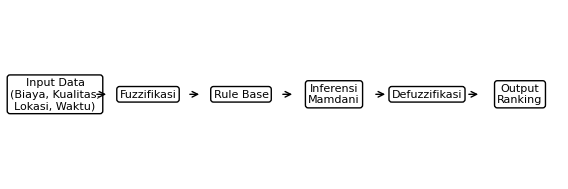

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 2.2))
ax.axis('off')

boxes = [
    "Input Data\n(Biaya, Kualitas,\nLokasi, Waktu)",
    "Fuzzifikasi",
    "Rule Base",
    "Inferensi\nMamdani",
    "Defuzzifikasi",
    "Output\nRanking"
]

x_positions = [0.5, 1.7, 2.9, 4.1, 5.3, 6.5]
y = 0.5

for i, (box, x) in enumerate(zip(boxes, x_positions)):
    ax.text(
        x, y, box,
        ha='center', va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.25", fill=False)
    )

    if i < len(x_positions) - 1:
        ax.annotate(
            "",
            xy=(x_positions[i+1] - 0.45, y),   # ujung panah
            xytext=(x + 0.45, y),              # awal panah
            arrowprops=dict(
                arrowstyle="->",
                lw=1,
                shrinkA=5,
                shrinkB=5
            )
        )

ax.set_xlim(0, 7)
ax.set_ylim(0, 1)
plt.show()


rules base

In [ ]:
import pandas as pd

rule_table = pd.DataFrame({
    "Biaya": ["Murah", "Sedang", "Mahal"],
    "Kualitas": ["Baik", "Baik", "Cukup"],
    "Waktu": ["Cepat", "Sedang", "Lama"],
    "Output": ["Tinggi", "Sedang", "Rendah"]
})

rule_table


,Biaya,Kualitas,Waktu,Output
0,Murah,Baik,Cepat,Tinggi
1,Sedang,Baik,Sedang,Sedang
2,Mahal,Cukup,Lama,Rendah


grafik

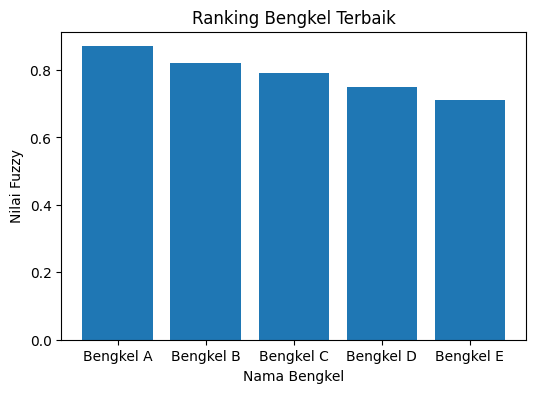

In [ ]:
import matplotlib.pyplot as plt

bengkel = ['Bengkel A', 'Bengkel B', 'Bengkel C', 'Bengkel D', 'Bengkel E']
nilai_fuzzy = [0.87, 0.82, 0.79, 0.75, 0.71]

plt.figure(figsize=(6,4))
plt.bar(bengkel, nilai_fuzzy)
plt.title("Ranking Bengkel Terbaik")
plt.ylabel("Nilai Fuzzy")
plt.xlabel("Nama Bengkel")
plt.show()
